In [116]:
import pandas as pd
pd.set_option('display.max_rows', None)

import plotly.express as px
import chart_studio.tools as tls

In [117]:
q1_path = 'datasets\\Jan-01-2024_Mar-31-2024_4051083528461598.csv'
q2_path = 'datasets\\Apr-01-2024_Jun-30-2024_2758116674392677.csv'
q3_path = 'datasets\\Jul-01-2024_Sep-30-2024_568596229332029.csv'
q4_path = 'datasets\\Oct-01-2024_Dec-30-2024_577241625163342.csv'

q1 = pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

## CREATE NEW COL TO REPRESENT QUARTER NUMBER IN A YEAR
q1['quarter'] = [1 for i in range(len(q1))]
q2['quarter'] = [2 for i in range(len(q2))]
q3['quarter'] = [3 for i in range(len(q3))]
q4['quarter'] = [4 for i in range(len(q4))]

df = pd.concat([q1,q2,q3,q4]).reset_index()
df.columns = [col.lower() for col in df.columns]

## CHANGE NaN VALUES TO ZERO (0)
df.fillna(0,inplace=True)

## RENAME SOME COLS
df.rename(columns={'duration (sec)': 'duration', 'publish time': 'datetime', 'post type': 'type', 'permalink': 'link'}, inplace=True)

## CHANGE DATA TYPE FROM FLOAT TO INT
int_cols = ['plays', 'follows']
df[int_cols] = df[int_cols].astype(int)

## DROP UNNEEDED COLS
drop_cols = ['index', 'post id', 'account id', 'account username', 'account name', 'data comment', 'date']
df = df.drop(drop_cols, axis=1)

## SPLIT VALUES IN 'datetime' TO 'date' AND 'time'
date = []
time = []
for n in df.datetime:
    time.append(n[11:])
    date.append(n[:-6])

df = df.drop(['datetime'], axis=1)
df['date'] = date
df['time'] = time

## ONLY SHOW FIRST <char_limit> CHARACTERS OF description
char_limit = 80
for j in range(len(df.description)):
    df.loc[j, 'description'] = df.description[j][:char_limit] + ' ...'

## FORMAT date VALUES
for d in range(len(df.date)):
    mm = df.date[d][:2]
    dd = df.date[d][3:5]
    yyyy = df.date[d][6:10]
    df.loc[d, 'date'] = f'{yyyy}-{mm}-{dd}'

## SORT BY DATE
df = df.sort_values(by='date', ascending=True)





# df.head()

In [118]:
image_posts = df[df.type=='IG image']
carousel_posts = df[df.type=='IG carousel']
reel_posts = df[df.type=='IG reel']

content_dict = {'image': image_posts, 'carousel': carousel_posts, 'reel': reel_posts}
content_types = content_dict.keys()

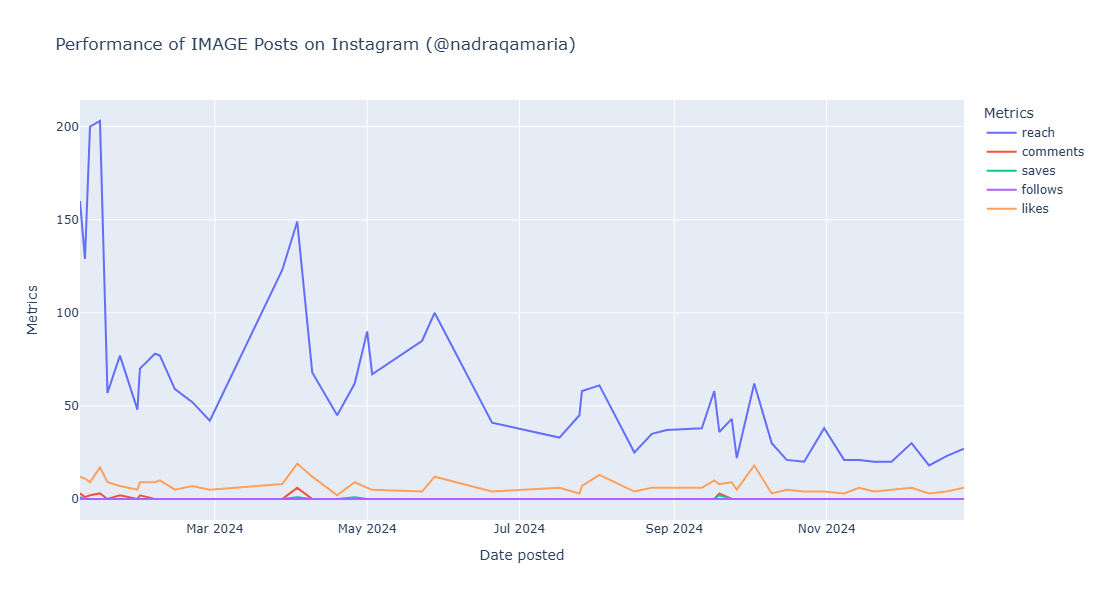


Top 5 Performing IMAGE Posts:


,link,date,reach,comments,saves,follows,likes,description
1,https://www.instagram.com/p/C2JTEDOI4Cb/,2024-01-15,203,3,0,0,17,Ever feel like web design is a language only d...
2,https://www.instagram.com/p/C19Y7g6scmh/,2024-01-11,200,2,0,0,9,Is your website just a pretty picture on the i...
3,https://www.instagram.com/p/C1zPvEdPPfr/,2024-01-07,160,3,1,0,12,"Welcome to my office, and yes, it is indeed my..."
4,https://www.instagram.com/p/C5TAD2WvsLE/,2024-04-03,149,6,1,0,19,This was me going for a startup challenge orga...
5,https://www.instagram.com/p/C14PUcEqZc9/,2024-01-09,129,1,0,0,11,Website got you feeling 💀? Don't fret! Squeeze...



Top 5 Performing CAROUSEL Posts:


,link,date,reach,comments,saves,follows,likes,description
1,https://www.instagram.com/p/C2NItfGP8Nt/,2024-01-17,147,0,0,0,10,Tired of staring at a website that's about as ...
2,https://www.instagram.com/p/C5Vd7j3rPZF/,2024-04-04,99,0,0,0,3,I've noticed a huge reason why tech startups s...
3,https://www.instagram.com/p/C7jMfZ9v2n3/,2024-05-29,74,0,0,0,3,"🚀 Startup owners, want to know a secret?\n\nSo..."
4,https://www.instagram.com/p/C9jugIfPIKm/,2024-07-18,73,0,0,0,7,What happens when you book a free discovery ca...
5,https://www.instagram.com/p/C5BZ5bAIkrC/,2024-03-27,60,6,1,0,9,No one tells you about how BORING it is to mai...


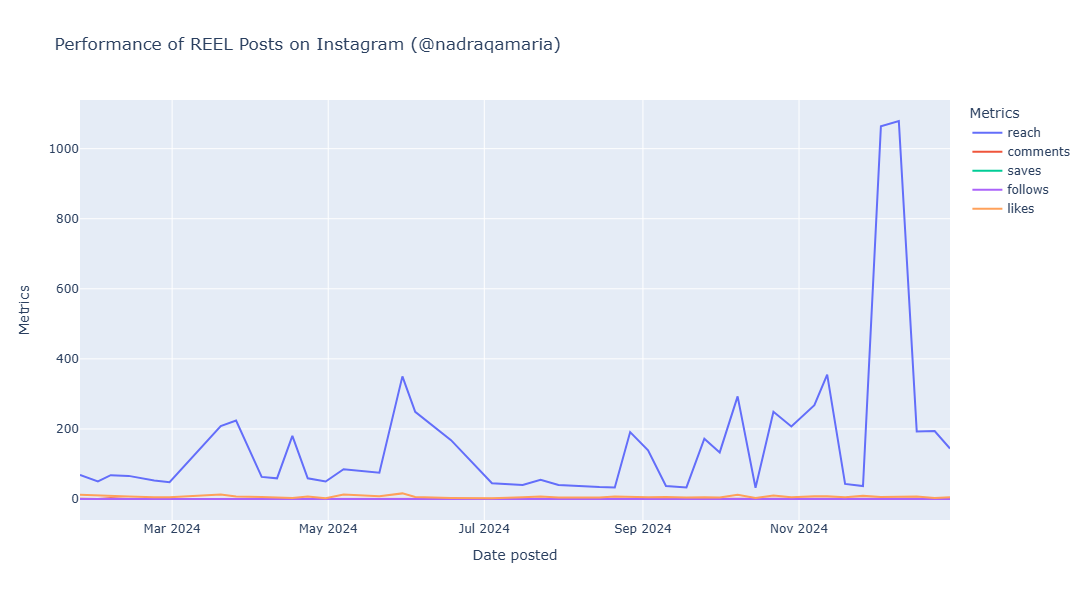


Top 5 Performing REEL Posts:


,link,date,reach,comments,saves,follows,likes,description
1,https://www.instagram.com/reel/DDZTfvEvCnj/,2024-12-10,1079,0,0,0,6,Read more 👇\n\nI’ll not be writing about busin...
2,https://www.instagram.com/reel/DDHR-0EvJ0w/,2024-12-03,1064,0,0,0,6,Read more 👇\n\nWhen creatives launch a busines...
3,https://www.instagram.com/reel/DCRObFxPzdM/,2024-11-12,355,0,0,0,8,Read more 👇🏽\n\nWe make hundreds of decisions ...
4,https://www.instagram.com/reel/C7lxUAeNsPS/,2024-05-30,350,0,1,2,16,Ever felt overwhelmed running your startup? I’...
5,https://www.instagram.com/reel/DA3FZ94hFhQ/,2024-10-08,293,0,0,0,12,"Read more 👇🏽\n\nOne year ago, I heard the term..."


In [129]:
metrics = ['reach','comments','saves','follows', 'likes']

graph_embeds = []

for t in content_types:
    print('\n\n\n\n\n')
    fig = px.line(content_dict[t], x="date", y=metrics,
             width=1100, height=600,
             labels={
                     "date": "Date posted",
                     "value": "Metrics",
                     "variable": "Metrics"
                 },
              title=f"Performance of {t.upper()} Posts on Instagram (@nadraqamaria)",
              custom_data=['description', 'link'])

    fig.update_traces(mode="lines",
                     hovertemplate="<br>".join([
                        "%{y}",
                        "Date: %{x}",
                        "Desc: %{customdata[0]}",
                        "Link: %{customdata[1]}"
                    ]))
    fig.update_layout(hovermode="x unified")
    
    fig.show()
    graph_embeds.append(tls.get_embed('https://plotly.com/~chris/1638'))



    ## SHOW TOP 5 PERFORMING POSTS
    top_5 = content_dict[t].sort_values(by=metrics, ascending=False)
    top_5_display = ['link', 'date', 'reach','comments','saves','follows', 'likes','description']
    top_5 = top_5[top_5_display].head().reset_index(drop=True)
    ## MAKE INDEX START FROM 1
    top_5.index += 1
    
    print(f'\nTop 5 Performing {t.upper()} Posts:')
    display(top_5)